# <u><b> Logistic Regression </b></u> 

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [4]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [5]:
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [79]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [80]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
churn_df.describe(include = ['object','category']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [82]:
churn_df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'class'], dtype='object')

In [83]:
churn_df.shape

(7043, 22)

In [84]:
#let's check for duplicate values 
len(churn_df[churn_df.duplicated()])

0

In [85]:
# let's see the dependent variable as well
churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [86]:
# Let's see the corelation as well 
churn_df.corr()
# note the corelation is only for the categorical variable only 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,class
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
class,0.150889,-0.352229,0.193356,-0.199484,1.000000


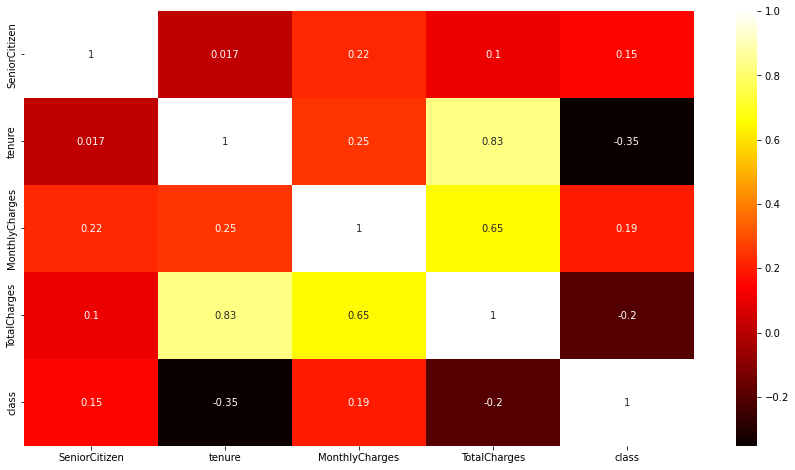

In [87]:
plt.figure(figsize = (15,8))
sns.heatmap(churn_df.corr(),annot = True,cmap = 'hot')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


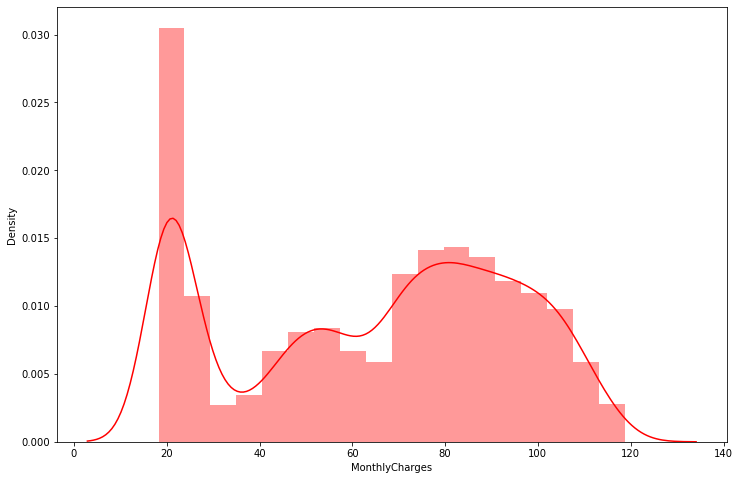

In [88]:
# let's see the monthly charges distribution 
plt.figure(figsize = (12,8))
sns.distplot(churn_df['MonthlyCharges'],color = 'red')
plt.show()

In [89]:
# most of the people have a monthly charge of around 20 and followed by 80

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


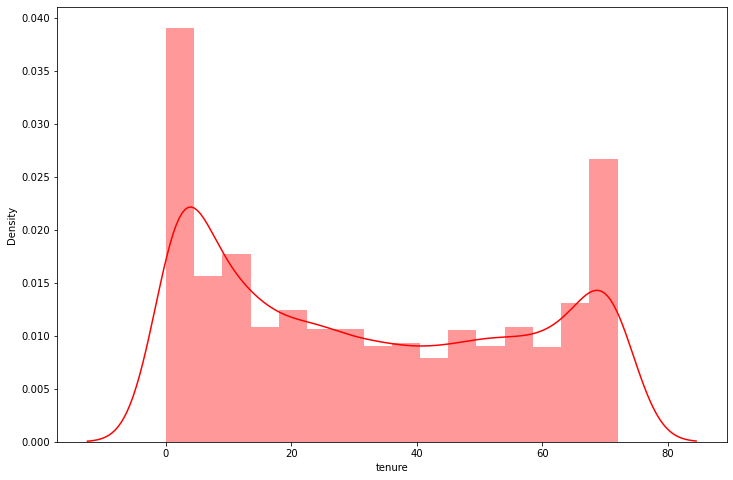

In [90]:
plt.figure(figsize = (12,8))
sns.distplot(churn_df['tenure'],color = 'red')
plt.show()

Text(0, 0.5, 'Monthly Charges')

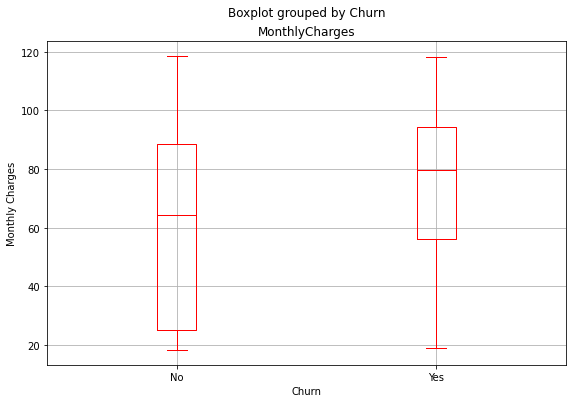

In [91]:
# let's check the distribution of churn and not churn in the monthly charges feature
plt.figure(figsize = (9,6))
ax = plt.gca()
churn_df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax, color = 'red')
ax.set_ylabel('Monthly Charges')

In [92]:
# the churn monthly charges are more then the not churn average 

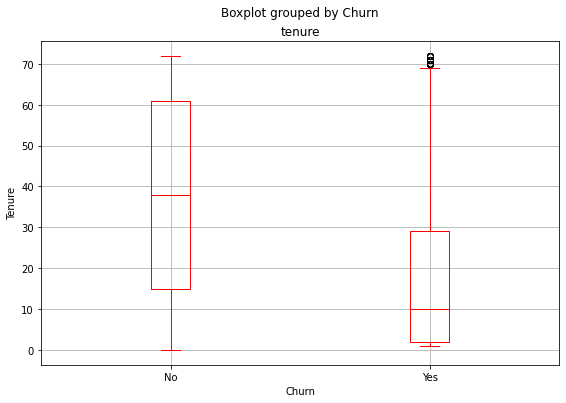

In [93]:
# let's do for the non tenure
plt.figure(figsize = (9,6))
ax = plt.gca()
churn_df.boxplot(column = 'tenure', by = 'Churn', ax = ax, color = 'red')
ax.set_ylabel('Tenure')
plt.show()

the people who churn have a very lef tenure then those who not churn and it is quite an axiom actually there are also outliers like they had stayed with the operator for a long time and then they churned the reason could be change in monthly charges 

In [94]:
churn_df.describe(include = ['object', 'category'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


So the features with highest unique value is 4 so we can do One hot encoding to check the multicolinearity 

In [95]:
churn_df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'class']

In [96]:
churn_df.describe().columns.tolist()

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'class']

In [97]:
col=list(set(churn_df.columns.tolist()) - set(churn_df.describe().columns.tolist()))

In [98]:
b=churn_df[col]

In [99]:
b.drop('customerID',axis = 1,inplace = True)

C:\Users\Deepu\AppData\Local\Temp\ipykernel_4652\2117775246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.drop('customerID',axis = 1,inplace = True)


In [100]:
b_coded=pd.get_dummies(b)

In [101]:
b_coded 

,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PhoneService_No,PhoneService_Yes,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Female,gender_Male
0,1,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1,1,0,0,0,1,1,0,0,1,0,...,0,1,1,0,0,0,0,1,0,1
2,1,0,0,0,1,0,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,1,0,0,0,1,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
7039,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
7040,1,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
7041,1,0,0,0,1,0,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [102]:
# don't do a heatmop on this as this is a classic example of curse of dimensionality 

In [103]:
a =churn_df[['gender','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup' ,'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']]

In [104]:
a

,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [105]:
pd.get_dummies(a)

,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,0,1,1,...,1,0,1,0,0,1,0,0,0,1
7039,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,1,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [106]:
a = pd.get_dummies(a,drop_first= True)
# so if you have 2 unique values then the entire information of class can be expalined by a single columns hence we do a drop first
a

,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,1,1,0,1,1,0,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


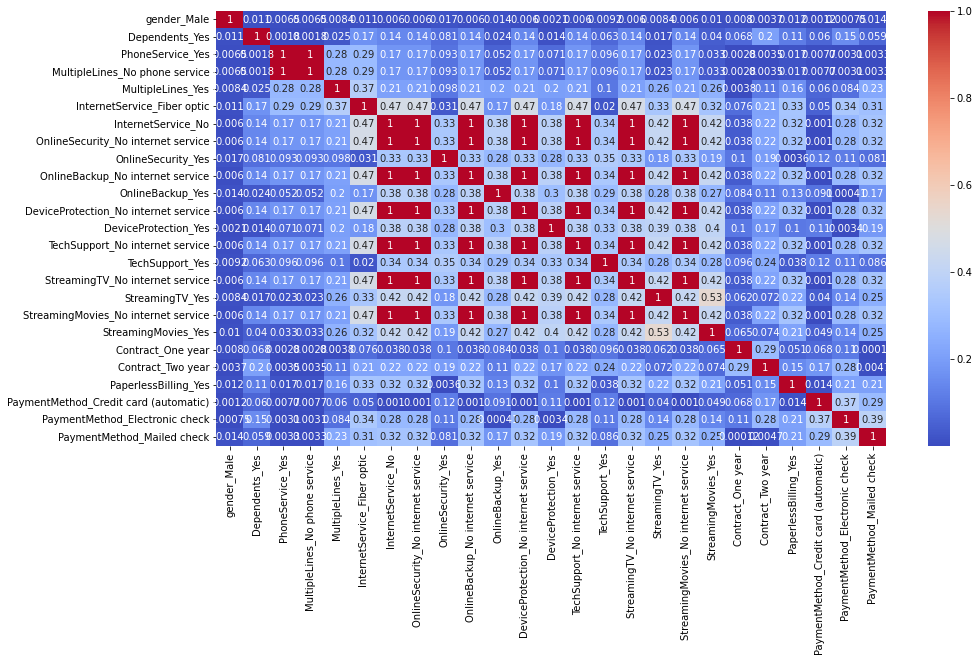

In [107]:
plt.figure(figsize = (15,8))
correlation = a.corr()
sns.heatmap(abs(correlation), annot = True,cmap = 'coolwarm')
plt.show()

In [108]:
churn_df['class'] = churn_df.Churn.apply(lambda x: 1 if x == 'Yes' else 0)

In [109]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [110]:
# Let's see if there are any null values in the Total charges columns

In [111]:
churn_df.TotalCharges.isnull().value_counts()
# it says no null values but since it is a string data type we should be a bit cautious 

False    7032
True       11
Name: TotalCharges, dtype: int64

In [112]:
churn_df.TotalCharges[:-10:-1]
# could not find the null values

7042    6844.50
7041     306.60
7040     346.45
7039    7362.90
7038    1990.50
7037    1419.40
7036     743.30
7035    1495.10
7034    6886.25
Name: TotalCharges, dtype: float64

In [113]:
churn_df[churn_df.TotalCharges.str.contains(" ",'')]
#well there are null values 

AttributeError: Can only use .str accessor with string values!

In [ ]:
# so this way you will get all the values of totalcharges which are not null
churn_df[~churn_df.TotalCharges.str.contains(" ",'')]

In [ ]:
# same thing you can do via this method
churn_df[churn_df.TotalCharges == ' ']

In [ ]:
#lets replace the empty cell with np.nan
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(' ',np.nan)

In [ ]:
churn_df['TotalCharges'].isna().sum()

In [ ]:
churn_df['TotalCharges'].isnull().sum()

In [ ]:
churn_df[churn_df['TotalCharges'] == ' ']

In [ ]:
churn_df['TotalCharges'].astype(float)

In [ ]:
churn_df['TotalCharges']=pd.to_numeric(churn_df['TotalCharges'])

In [ ]:
churn_df.loc[:,['MonthlyCharges','TotalCharges','tenure','class']]

In [ ]:
# Now what we will do is we will concat the a dataframe and the numeric features of the churn_df dataframe 
df1 = churn_df.loc[:,['MonthlyCharges','TotalCharges','tenure','class']]


In [ ]:
n_df=pd.concat([a,df1.reindex(a.index)],axis = 1)
n_df

In [ ]:
pd.concat([a,df1],axis = 1)
# will check what is the reindex(a.index) do 

In [ ]:
# let's check the TotalCharges columns as well
plt.figure(figsize = (12,8))
sns.distplot(n_df['TotalCharges'],color = 'red')
plt.title('Distribution of Total Charges')

In [ ]:
plt.figure(figsize = (9,6))
ax = plt.gca()
n_df.boxplot(column = 'TotalCharges', by = 'class', ax = ax,color = 'red')

In [ ]:
plt.figure(figsize = (20,12))
sns.heatmap(abs(n_df.corr()),annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
# Let's drop all the fetures which has a high collinearity
n_df.drop(['InternetService_Fiber optic',	'InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',	'TechSupport_No internet service','StreamingTV_No internet service','StreamingTV_Yes','StreamingMovies_No internet service','StreamingMovies_Yes','MultipleLines_No phone service','Contract_Two year','MultipleLines_Yes','OnlineBackup_Yes','DeviceProtection_Yes','Dependents_Yes','Dependents_Yes','Dependents_Yes','Contract_One year','PaymentMethod_Credit card (automatic)','TechSupport_Yes','OnlineSecurity_Yes','PaymentMethod_Mailed check','PaperlessBilling_Yes','PaymentMethod_Electronic check'],axis=1,inplace=True)

In [ ]:
n_df

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(abs(n_df.corr()),annot = True, cmap = 'coolwarm')
plt.show()

In [114]:
n_df.isnull().sum()

gender_Male         0
PhoneService_Yes    0
MonthlyCharges      0
TotalCharges        0
tenure              0
class               0
dtype: int64

In [115]:
# So we have null values lets repalce those values 
n_df.replace([np.inf, -np.inf], np.nan)

,gender_Male,PhoneService_Yes,MonthlyCharges,TotalCharges,tenure,class
0,0,0,29.85,29.85,1,0
1,1,1,56.95,1889.50,34,0
2,1,1,53.85,108.15,2,1
3,1,0,42.30,1840.75,45,0
4,0,1,70.70,151.65,2,1
...,...,...,...,...,...,...
7038,1,1,84.80,1990.50,24,0
7039,0,1,103.20,7362.90,72,0
7040,0,0,29.60,346.45,11,0
7041,1,1,74.40,306.60,4,1


In [116]:
#Let's drop the rows of all the nan values
n_df.replace([np.inf,-np.inf], np.nan).dropna(axis = 0, inplace = True)
# here is how it works we first replace the values with np.nan and then we drop the rows of np.nan 

In [117]:
n_df

,gender_Male,PhoneService_Yes,MonthlyCharges,TotalCharges,tenure,class
0,0,0,29.85,29.85,1,0
1,1,1,56.95,1889.50,34,0
2,1,1,53.85,108.15,2,1
3,1,0,42.30,1840.75,45,0
4,0,1,70.70,151.65,2,1
...,...,...,...,...,...,...
7038,1,1,84.80,1990.50,24,0
7039,0,1,103.20,7362.90,72,0
7040,0,0,29.60,346.45,11,0
7041,1,1,74.40,306.60,4,1


In [118]:
# the above code is not working let's do this instead
n_df.dropna(inplace = True)

In [119]:
n_df
# the np.nan rows have been droped 

,gender_Male,PhoneService_Yes,MonthlyCharges,TotalCharges,tenure,class
0,0,0,29.85,29.85,1,0
1,1,1,56.95,1889.50,34,0
2,1,1,53.85,108.15,2,1
3,1,0,42.30,1840.75,45,0
4,0,1,70.70,151.65,2,1
...,...,...,...,...,...,...
7038,1,1,84.80,1990.50,24,0
7039,0,1,103.20,7362.90,72,0
7040,0,0,29.60,346.45,11,0
7041,1,1,74.40,306.60,4,1


# Now that we have the data prepared let's fit a logistic regression model on it 

In [120]:
X = n_df.iloc[:,:-1] # excluding the dependend variable
y = n_df['class'].copy()

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [122]:
X_train.shape, X_test.shape

((5625, 5), (1407, 5))

In [123]:
y_train.shape, y_test.shape

((5625,), (1407,))

In [124]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept = True, max_iter = 10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [125]:
# the weights 
clf.coef_

array([[-3.02723324e-01, -8.25776701e-01,  3.08533186e-02,
         2.34030909e-04, -7.65856036e-02]])

In [126]:
# y intercept
clf.intercept_

array([-0.67618567])

In [127]:
y_pred_train = clf.predict(X_train)

In [128]:
y_pred_test = clf.predict(X_test)

In [129]:
from sklearn import metrics
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
print('The train accuracy is {}'.format(train_accuracy))

The train accuracy is 0.7895111111111112


In [130]:
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print('The test accuracy is {}'.format(test_accuracy))

The test accuracy is 0.7860696517412935


In [131]:
accuracy is correct prediction divided by total number of prediction 

SyntaxError: invalid syntax (3493893101.py, line 1)

In [132]:
# lets get the probability of the class 
train_preds_proba = clf.predict_proba(X_train)
test_preds_proba = clf.predict_proba(X_test)

In [133]:
train_preds_proba

array([[0.82160108, 0.17839892],
       [0.8208    , 0.1792    ],
       [0.99748295, 0.00251705],
       ...,
       [0.75304344, 0.24695656],
       [0.45658622, 0.54341378],
       [0.86587152, 0.13412848]])

In [134]:
test_preds_proba

array([[0.7754452 , 0.2245548 ],
       [0.9102906 , 0.0897094 ],
       [0.72372574, 0.27627426],
       ...,
       [0.48990845, 0.51009155],
       [0.75480056, 0.24519944],
       [0.54169877, 0.45830123]])

# Confusion matrix

In [135]:
from sklearn.metrics import confusion_matrix

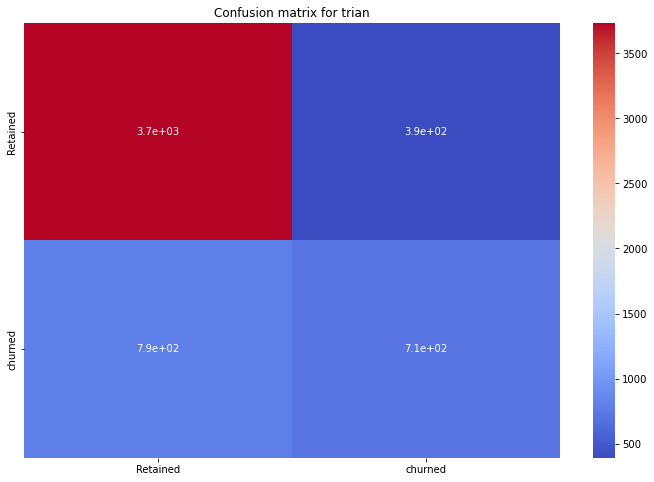

In [136]:
plt.figure(figsize = (12,8))
ax = plt.gca()
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train,annot = True, ax = ax, cmap = 'coolwarm')
ax.set_title('Confusion matrix for trian')
ax.xaxis.set_ticklabels(['Retained','churned'])
ax.yaxis.set_ticklabels(['Retained','churned'])
plt.show()

In [137]:
cm_train

array([[3733,  392],
       [ 792,  708]], dtype=int64)

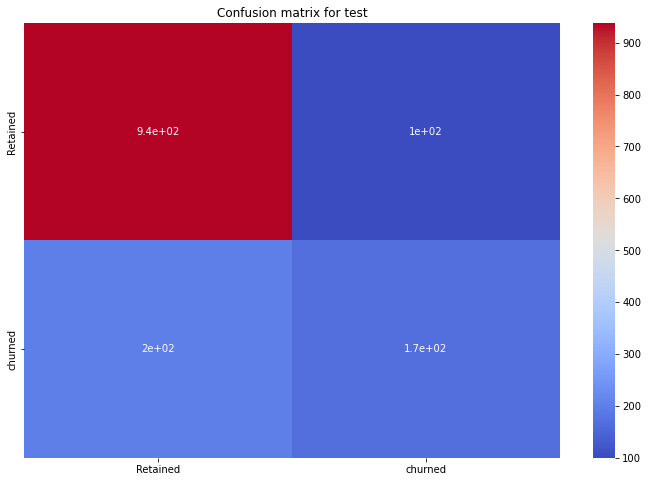

In [138]:
plt.figure(figsize = (12,8))
ax = plt.gca()
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test,annot = True, ax = ax, cmap = 'coolwarm')
ax.set_title('Confusion matrix for test')
ax.xaxis.set_ticklabels(['Retained','churned'])
ax.yaxis.set_ticklabels(['Retained','churned'])
plt.show()

In [139]:
cm_test

array([[938, 100],
       [201, 168]], dtype=int64)

In [140]:
print(metrics.classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1139
           1       0.46      0.63      0.53       268

    accuracy                           0.79      1407
   macro avg       0.68      0.73      0.69      1407
weighted avg       0.82      0.79      0.80      1407



- So to understand the confusion matrix do it with this way consdier that you have 100 records, 70 class 1 and 30 class 0 find label then TP,TN,FP,FN and do the recall( happens in the same class) precession ( corrected guess/ correct guess plus the guess you said correct but were wrong

From the confusion matrix we can say that :

True positive(TP).: This shows that a model correctly predicted Positive cases as Positive.

False positive(FP): This shows that a model incorrectly predicted Negative cases as Positive.

False Negative:(FN) This shows that an incorrectly model predicted Positive cases as Negative.

True Negative(TN): This shows that a model correctly predicted Negative cases as Positive.

In [141]:
#let's also see the log loss value a low log loss value means error is less 
from sklearn.metrics import log_loss
log_loss(y_train, train_preds_proba) # takes the probability value of prediction 

0.4496654251431065

In [142]:
log_loss(y_test,test_preds_proba)

0.45337025358528144

# CROSS VALIDATION 

## cross validation on the entire data set 

In [143]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [144]:
logistic = LogisticRegression()

In [145]:
scoring = ['accuracy']
scores = cross_validate(logistic, X, y, scoring = scoring, cv = 5, return_train_score = True, return_estimator = True, verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.786, test=0.790) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.792, test=0.770) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.796) total time=   0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [146]:
scores['train_accuracy']

array([0.78613333, 0.7872    , 0.79150373, 0.78706008, 0.78546036])

In [147]:
scores['test_accuracy']

array([0.78962331, 0.79104478, 0.76955903, 0.79089616, 0.79587482])

In [148]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [149]:
for model in scores['estimator']:
    print(model.coef_)

[[-2.77965849e-02 -1.03831809e+00  3.36909121e-02  1.92003115e-04
  -7.24383713e-02]]
[[-1.60091065e-02 -1.02538006e+00  3.29120831e-02  1.76760450e-04
  -7.15601828e-02]]
[[-9.42782358e-03 -1.07190269e+00  3.38580939e-02  1.95128022e-04
  -7.35999478e-02]]
[[ 2.37924907e-02 -1.07286129e+00  3.42627789e-02  2.33192195e-04
  -7.62123998e-02]]
[[-1.31788906e-02 -1.05383846e+00  3.37399084e-02  1.62590965e-04
  -7.10560526e-02]]


## cross validation on the X_train and y_train 

In [150]:
logistic = LogisticRegression()

In [151]:
scoring = ['accuracy']
scores = cross_validate(logistic, X_train, y_train, scoring = scoring, return_train_score = True , return_estimator = True , verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.794) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.792, test=0.781) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.791, test=0.778) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.805) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.791, test=0.776) total time=   0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [152]:
scores['train_accuracy']

array([0.78688889, 0.79177778, 0.79088889, 0.78533333, 0.79066667])

In [153]:
scores['test_accuracy']

array([0.79377778, 0.78133333, 0.77777778, 0.80533333, 0.776     ])

In [154]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [155]:
for model in scores['estimator']:
    print(model.coef_)

[[ 4.42847008e-02 -1.05252727e+00  3.34017915e-02  2.02440325e-04
  -7.40038117e-02]]
[[-2.52637645e-01 -8.61997858e-01  3.10690563e-02  2.17293716e-04
  -7.41370048e-02]]
[[ 7.97251434e-03 -1.08545057e+00  3.53158998e-02  1.56948604e-04
  -7.11700301e-02]]
[[ 3.29315090e-02 -9.51238558e-01  3.24024619e-02  2.24597842e-04
  -7.58561096e-02]]
[[ 2.95853609e-04 -1.02303476e+00  3.36587594e-02  2.14733750e-04
  -7.71373351e-02]]


So I am a bit confused between cross validation part i.e the cv should be done on the entire dataset and not on the X_train, and y_train Let's drop this thing for now 

The estimator is basically a model build on the subset of data if cv = 5 we will have five estimators
If you specify cv=5 (i.e., 5-fold cross-validation), you will have 5 fitted estimators in scores['estimator']. Each of these estimators corresponds to a model trained on one of the 5 subsets (folds) of your data during the cross-validation process. These models are trained independently on different subsets of your data, and they can be used for various purposes such as prediction, evaluation, or further analysis.

In [156]:
from sklearn.model_selection import RepeatedStratifiedKFold # this is basically means to preserve the class ratio(distribution) in the folds 
from sklearn.model_selection import GridSearchCV # in simple Cv we split the data into folds in repeated cv the split happens repeatedly after CV cycle  
model = LogisticRegression()
solvers = ['lbfgs'] # this is a method or the algo or math to minimize the loss function example the matirx method and the gradient method i.e exact value(normal equation) and approxiation method 
penalty = ['l2'] # ridge penalty i. square of parameteres 
c_values = [100, 10, 1.0, 0.1, 0.01] # this is regularization parameter not the learning rate 
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values) # so grid search creates a cartesian product and then runs the model on the combination of those values 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # here is where the split is happening repeatedly 
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y) # this is the most correct way of CV data ingestion I have seen in the leactures notebook
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.787922 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787401 (0.010947) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787306 (0.011296) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787306 (0.011223) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787781 (0.011384) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787922 (0.011773) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [157]:
print(grid)

{'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}


# this is how many times the model will run 

The code you provided will run a Logistic Regression model multiple times as part of a Grid Search with Cross-Validation (CV) to find the best hyperparameters for the model. Here's how many times the model will run with the given code:

1. **Solver Loop**: There is one solver specified ('lbfgs').

2. **Penalty Loop**: There is one penalty specified ('l2').

3. **C Values Loop**: There are five different values specified for the regularization parameter C: [100, 10, 1.0, 0.1, 0.01].

4. **CV Splits**: You are using Repeated Stratified K-Fold Cross-Validation with 10 splits repeated 3 times. So, this will result in 10 splits x 3 repeats = 30 different train-test splits.

Therefore, the model will run a total of: 

1 (Solver) x 1 (Penalty) x 5 (C values) x 30 (CV splits) = 150 times.

It will run 150 times with different combinations of solver, penalty, and C values while using repeated stratified K-fold cross-validation for each combination to find the best hyperparameters and their corresponding performance scores.

30 is 10 splits X 3 times this process with different split maintaining the ratio of class 